In [1]:
!pip install -U imbalanced-learn

In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 387.0 kB/s eta 0:00:00a 0:00:01
  Obtaining depe

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

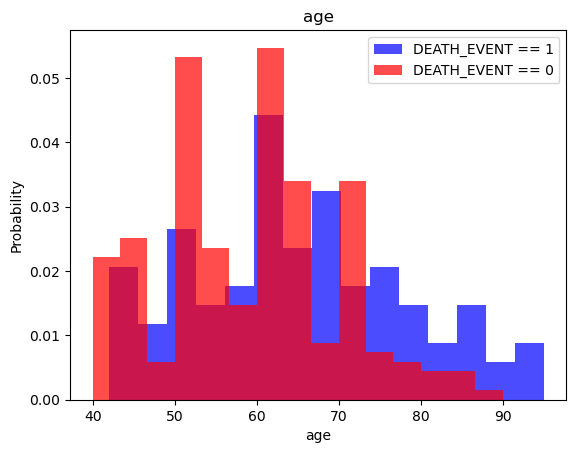

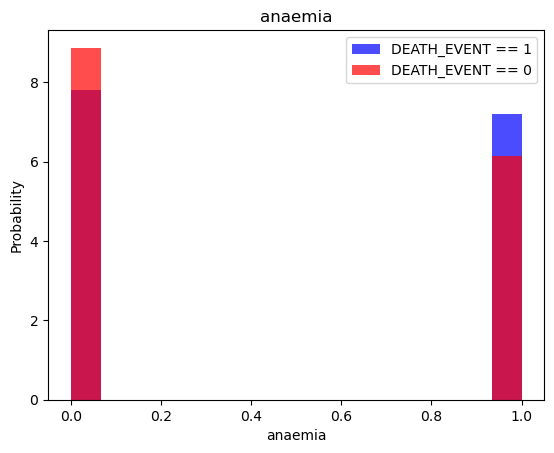

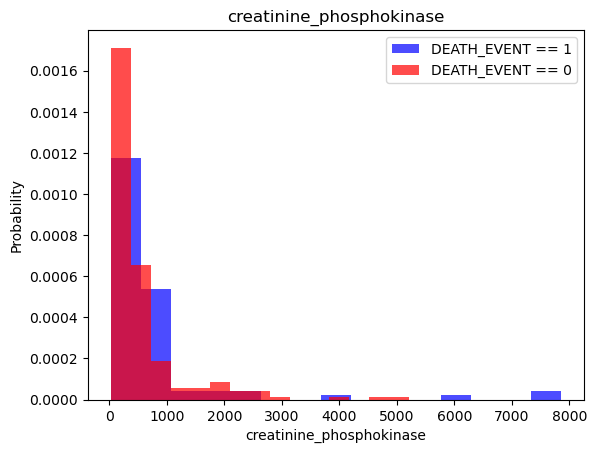

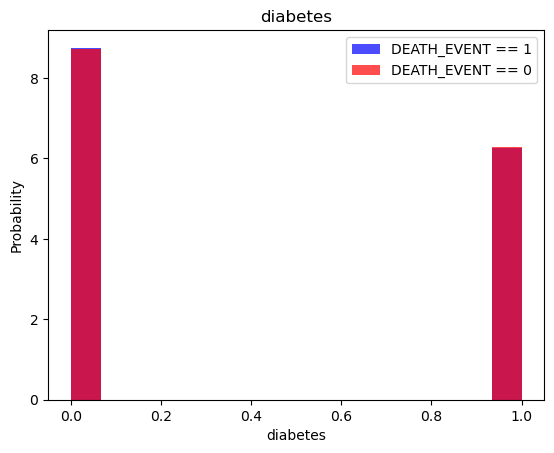

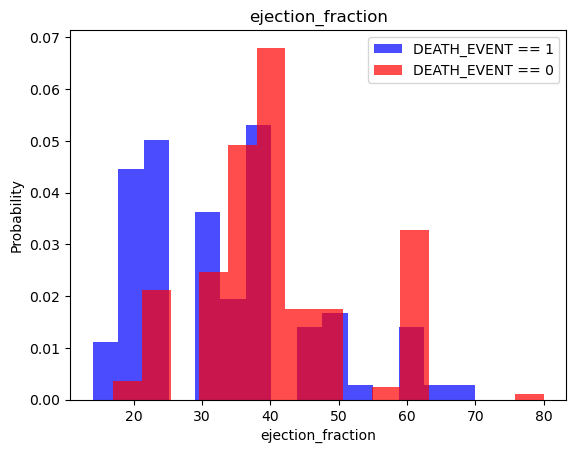

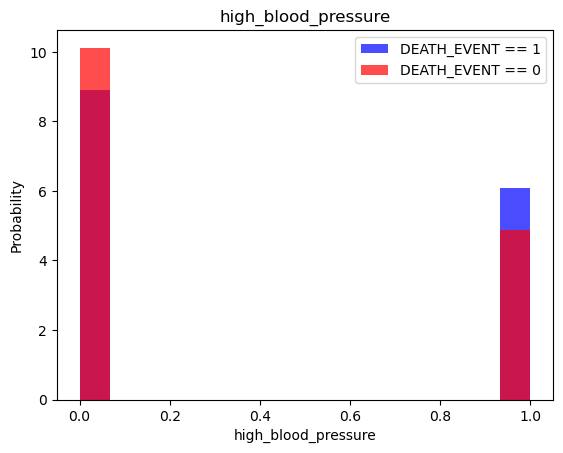

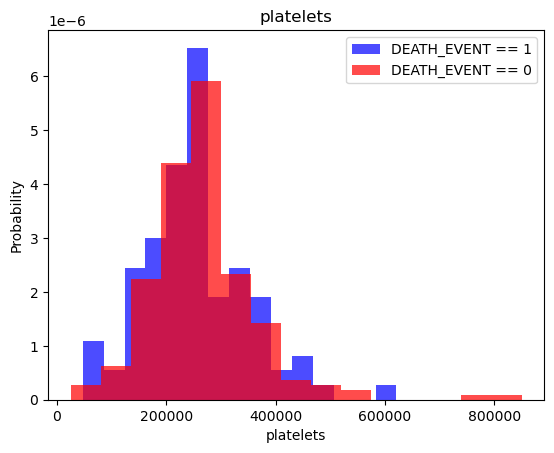

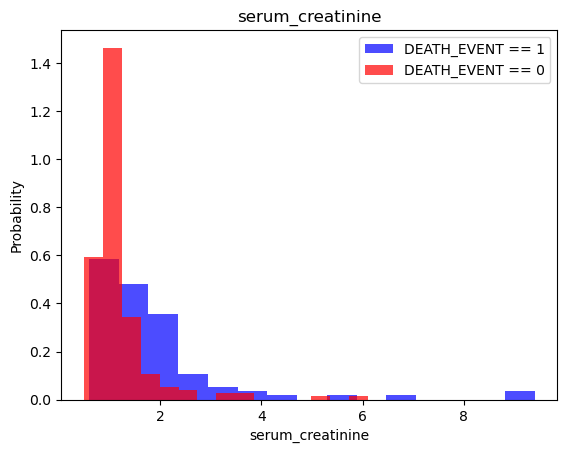

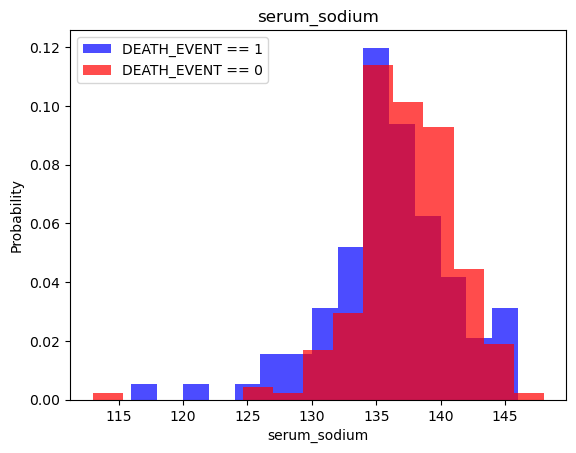

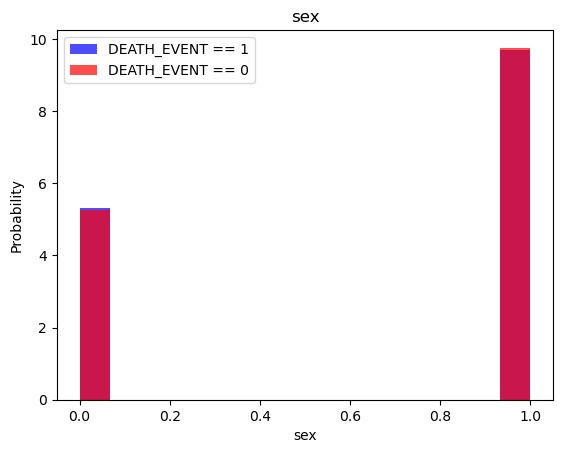

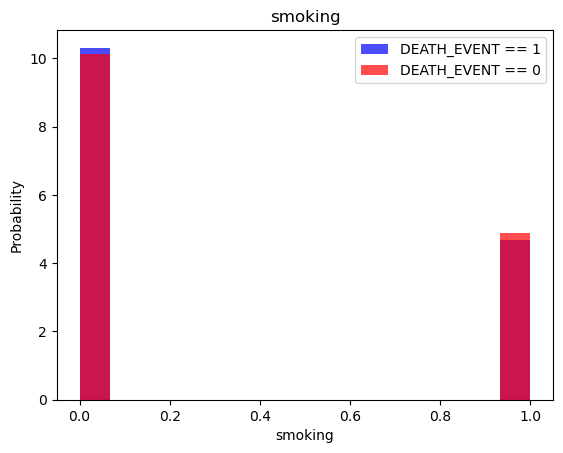

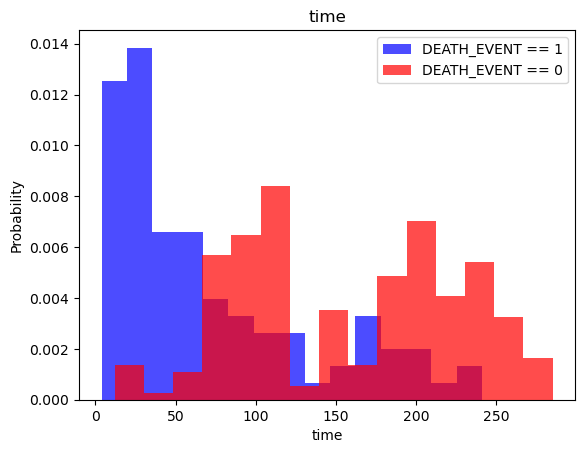

In [6]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]

  plt.hist(df[df["DEATH_EVENT"] == 1][label], color='blue', label="DEATH_EVENT == 1", alpha=0.7, density=True, bins=15)
  plt.hist(df[df["DEATH_EVENT"] == 0][label], color='red', label="DEATH_EVENT == 0", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
X.shape, y.shape

((299, 12), (299,))

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)


In [9]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [10]:
len(transformed_df[transformed_df["DEATH_EVENT"]==1]), len(transformed_df[transformed_df["DEATH_EVENT"]==0])

(203, 203)

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [14]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 762us/step - loss: 0.6370 - accuracy: 0.6337


[0.6369530558586121, 0.6337448358535767]

In [15]:
model.evaluate(X_valid, y_valid)

3/3 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6667


[0.6526026129722595, 0.6666666865348816]

In [16]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.6420 - val_loss: 0.6355 - val_accuracy: 0.7037
Epoch 2/20
16/16 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.6708 - val_loss: 0.6205 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.7202 - val_loss: 0.6040 - val_accuracy: 0.7284
Epoch 4/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.7284 - val_loss: 0.5869 - val_accuracy: 0.7407
Epoch 5/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7407 - val_loss: 0.5777 - val_accuracy: 0.7531
Epoch 6/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5259 - accuracy: 0.7407 - val_loss: 0.5608 - val_accuracy: 0.7531
Epoch 7/20
16/16 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.7695 - val_loss: 0.5450 - val_accuracy: 0.7654
Epoch 8/20
16/16 [==

In [17]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.7561


[0.4574904441833496, 0.7560975551605225]